In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

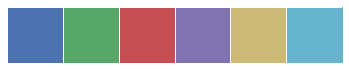

In [2]:
sns.set_palette("deep")
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [3]:
# Pandas Changes
pd.options.display.max_columns = 120

### Load Data

In [ ]:
# df2003 = pd.read_csv("2003.csv",engine="python")
# df2004 = pd.read_csv("2004.csv",engine="python")
# df2005 = pd.read_csv("2005.csv",engine="python")
# df2006 = pd.read_csv("2006.csv",engine="python")
# df2007 = pd.read_csv("2007.csv",engine="python")
# df2008 = pd.read_csv("2008.csv",engine="python")
# df2009 = pd.read_csv("2009.csv",engine="python")
# df2010 = pd.read_csv("2010.csv",engine="python")
# df2011 = pd.read_csv("2011.csv",engine="python")
# df2012 = pd.read_csv("2012.csv",engine="python")
# df2013 = pd.read_csv("2013.csv",engine="python")
# df2014 = pd.read_csv("2014.csv",engine="python")
# df2015 = pd.read_csv("2015.csv",engine="python")

In [5]:
# Improved loading for datetime
df = pd.read_csv("2003.csv", encoding="latin1", low_memory=False,
                     converters={"datestop": str, "timestop":str})

In [7]:
year = df["year"][0]

## Date Time Cleaning

### "stoptime"
Non Zero Padded,  No :

* 2010
* 2011
* 2012
* 2013
* 2014

Zero-Padded No :

* 2005
* 2006
* 2007
* 2008
* 2009

Zero-Padded w/:

* 2003
* 2004

In [8]:
def timePadding(time):
    if len(time) < 4:
        numMissing = 4- len(time)
        rv = "0"*numMissing + time
        return rv
    else:
        return time

In [9]:
if year >= 2010:
    df["timestop"] = df["timestop"].apply(timePadding)
if year <= 2004:
    df["timestop"] = df["timestop"].str.replace(":", "")
    

In [10]:
# This works for 2003
df["datestop"] = pd.to_datetime(df["datestop"], format="%m%d%Y")
df["timestop"] = pd.to_datetime(df["timestop"], format="%H%M", coerce=True)
df["hour"] = df["timestop"].dt.hour
df["minute"] = df["timestop"].dt.minute
df["dayofyear"] = df["datestop"].dt.dayofyear
df["month"] = df["datestop"].dt.month
df["dayofweek"] = df["datestop"].dt.dayofweek
df["weekofyear"] = df["datestop"].dt.weekofyear
del df["timestop"]

In [11]:
df.head()

,year,pct,ser_num,datestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm,hour,minute,dayofyear,month,dayofweek,weekofyear
0,2003,70,5,2003-01-01,,O,,1,ROBBERY,2,V,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,071,071,Y,N,,,M,B,07291986,16,5,9,160,BK,BR,M,,L,,,,240,CROWN ST.,,,,,,,,,,,,,,,,3,0,1,1,2,1
1,2003,70,3,2003-01-01,,O,,1,ROBBERY,3,V,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,Y,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,071,071,N,N,,,M,B,10151988,15,5,8,150,BK,ZZ,M,,L,,,SIDEWALK,240,CROWN ST (F/O),,,,,,,,,,,,,,,,3,0,1,1,2,1
2,2003,68,1406,2003-01-01,,I,,1,CPW,5,V,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,071,071,N,N,,,M,Q,08271963,39,5,6,180,BK,BR,M,,L,,,BASEMNT,NaN,270 CLOWN ST,,,,,,,,,,,,,,,,3,0,1,1,2,1
3,2003,48,4,2003-01-01,,I,,1,BURGLARY,10,R,Y,Y,N,,N,,0,0,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,049,049,N,N,V,S,F,Q,12311900,20,5,6,0,BK,XX,Z,,L,,,BUILDING,2125,CRUJES AVE,,,,,,,,,,,,,,,,16,0,1,1,2,1
4,2003,48,999991,2003-01-02,,O,,30,ROBBERY,10,P,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,048,319,N,N,,,M,B,06081983,19,6,0,155,BK,BK,T,,L,,,STREET,NaN,I/O WHITE PLAINS RD & ALLERTON,,,,,,,,,,,,,,,,3,35,2,1,3,1


In [12]:
hourly_counts = df.groupby(["hour"]).size()#.agg(["mean", "sum"])
hours = hourly_counts.index
counts = hourly_counts

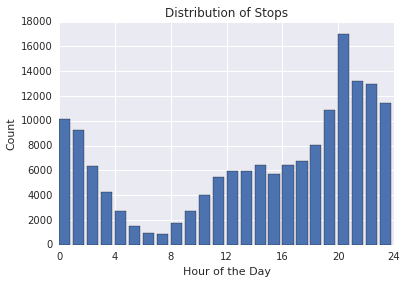

In [13]:
plt.bar(hours, counts)
plt.title("Distribution of Stops")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.xlim([0,24])
plt.xticks([0,4,8,12,16,20,24])
plt.show()

In [14]:
dailyCounts = df.groupby(["dayofyear"]).size()
days = dailyCounts.index
d_counts = dailyCounts

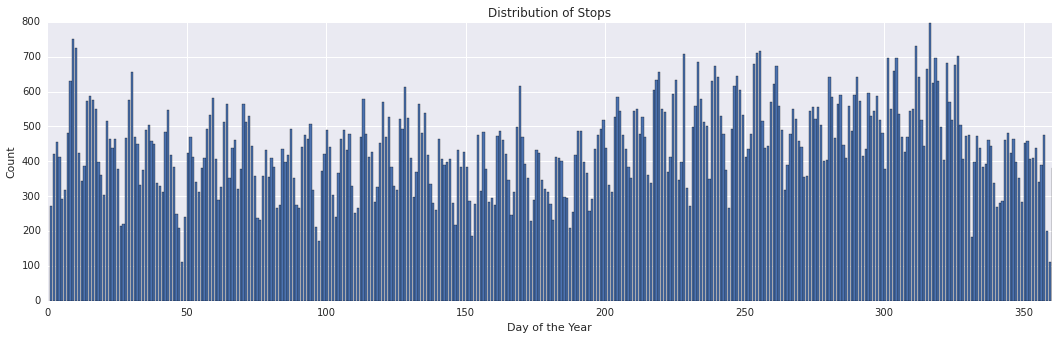

In [15]:
plt.figure(figsize=(18,5))
plt.bar(days, d_counts)
plt.title("Distribution of Stops")
plt.xlabel("Day of the Year")
plt.xlim([0,360])
plt.ylabel("Count")

plt.show()

In [21]:
dat = {"day": days, "count": d_counts}
dfDailyCounts = pd.DataFrame(dat)
dfDailyCounts.head()

,count,day
dayofyear,,
1,273,1
2,420,2
3,456,3
4,411,4
5,291,5


In [20]:
gammas = sns.load_dataset("gammas")
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0,IPS,0,0.513433
1,0,IPS,1,-0.414368
2,0,IPS,2,0.214695
3,0,IPS,3,0.814809
4,0,IPS,4,-0.894992


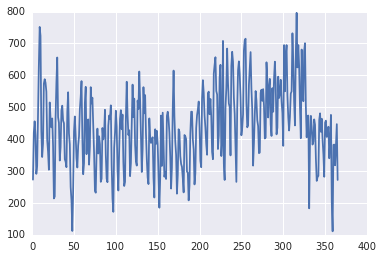

In [24]:
plt.plot(dfDailyCounts["day"], dfDailyCounts["count"])

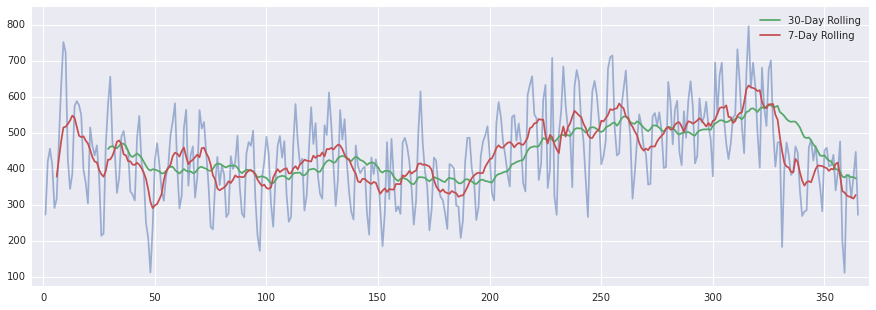

In [56]:
plt.figure(figsize=(15, 5))
rolmean7 = pd.rolling_mean(dfDailyCounts["count"], window=7)
rolmean30 = pd.rolling_mean(dfDailyCounts["count"], window=30)

rolstd = pd.rolling_std(dfDailyCounts["count"], window=7)
plt.plot(dfDailyCounts["day"], dfDailyCounts["count"], alpha=0.5)
plt.plot(rolmean30, label='30-Day Rolling')
plt.plot(rolmean7, label='7-Day Rolling')
# plt.plot(rolstd,)
plt.xlim(-5,370)
plt.ylim(75, 850)
plt.xlabel()
plt.legend()

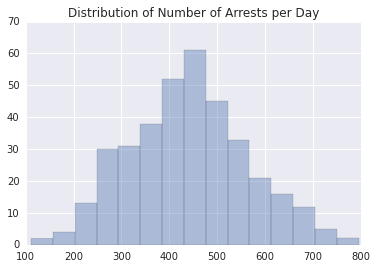

In [152]:
d_plot = sns.distplot(d_counts,kde=False,)
d_plot.axes.set_title("Distribution of Number of Arrests per Day")

### Day of Week

In [36]:
day_of_week_counts = df.groupby(["dayofweek"]).size()
day_num = day_of_week_counts.index
dw_counts = day_of_week_counts

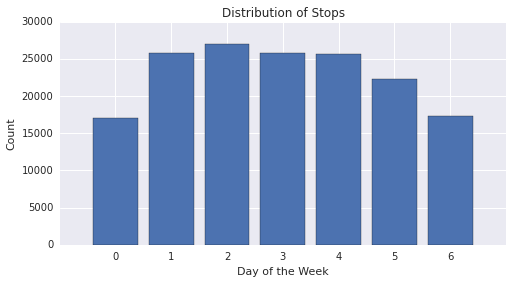

In [40]:
plt.figure(figsize=(8, 4))
plt.bar(day_num, dw_counts, align='center')
plt.title("Distribution of Stops")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xlim([-1,7])
plt.xticks(list(range(0,7)))
plt.show()

### Week of Year

In [42]:
week_of_year_counts = df.groupby(["weekofyear"]).size()
week_num = week_of_year_counts.index
week_counts = week_of_year_counts

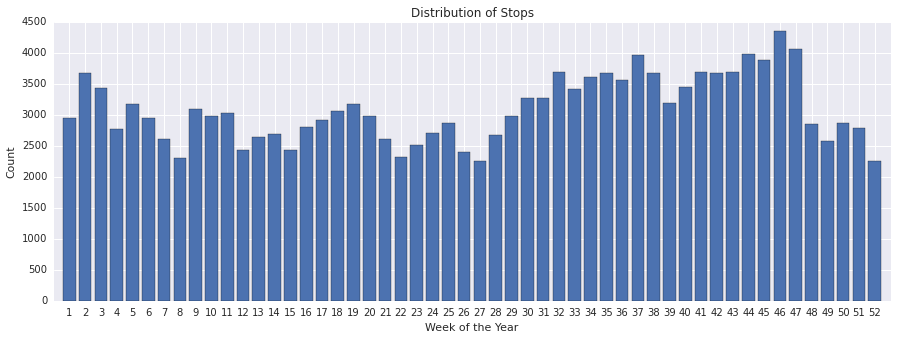

In [43]:
plt.figure(figsize=(15, 5))
plt.bar(week_num, week_counts, align='center')
plt.title("Distribution of Stops")
plt.xlabel("Week of the Year")
plt.ylabel("Count")
plt.xlim([0,53])
plt.xticks(list(range(1,53)))
plt.show()

### Monthly Counts

In [44]:
monthly_counts = df.groupby(["month"]).size()
months = monthly_counts.index
m_counts = monthly_counts

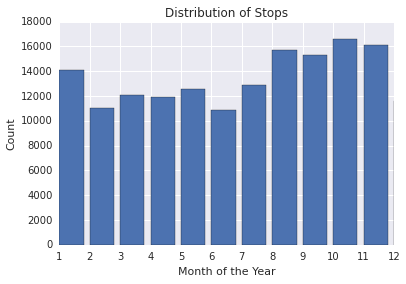

In [45]:
plt.bar(months, m_counts)
plt.title("Distribution of Stops")
plt.xlabel("Month of the Year")
plt.ylabel("Count")
plt.xlim([1,12])
plt.xticks(list(range(1,13)))
plt.show()

In [67]:
df["sex"].value_counts()

M    138866
Z     11848
F      9975
        162
dtype: int64

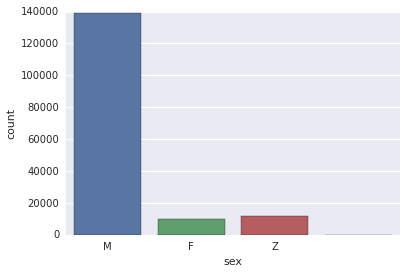

In [90]:
sns.countplot(df["sex"])

B    77704
Q    36413
W    17623
Z    14089
P     8168
A     4138
X     2136
I      416
       162
U        2
dtype: int64


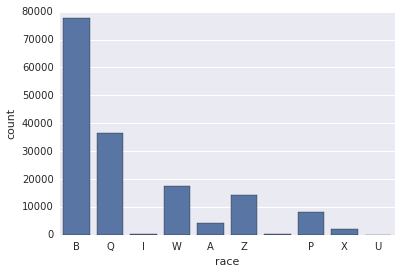

In [181]:
print(df["race"].value_counts())
sns.countplot(df["race"],color=sns.color_palette("deep")[0])